In [1]:
import proplot as plot
import numpy as np
import yaml

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [18]:
from pizza_cutter_sims.sim import generate_sim
from pizza_cutter_sims.constants import PIXEL_SCALE

rng = np.random.RandomState()
gal_rng = np.random.RandomState()

with open("../runs/run0006_wcs-dsep_gals-bg_msk-None_coadd-3/config.yaml") as fp:
    cfg = yaml.safe_load(fp.read())

data = generate_sim(
    rng=rng,
    gal_rng=gal_rng,
    coadd_config=cfg["coadd"],
    se_config=cfg["se"],
    psf_config=cfg["psf"],
    gal_config=cfg["gal"],
    layout_config=cfg["layout"],
    msk_config=cfg["msk"],
    shear_config=cfg["shear"],
)

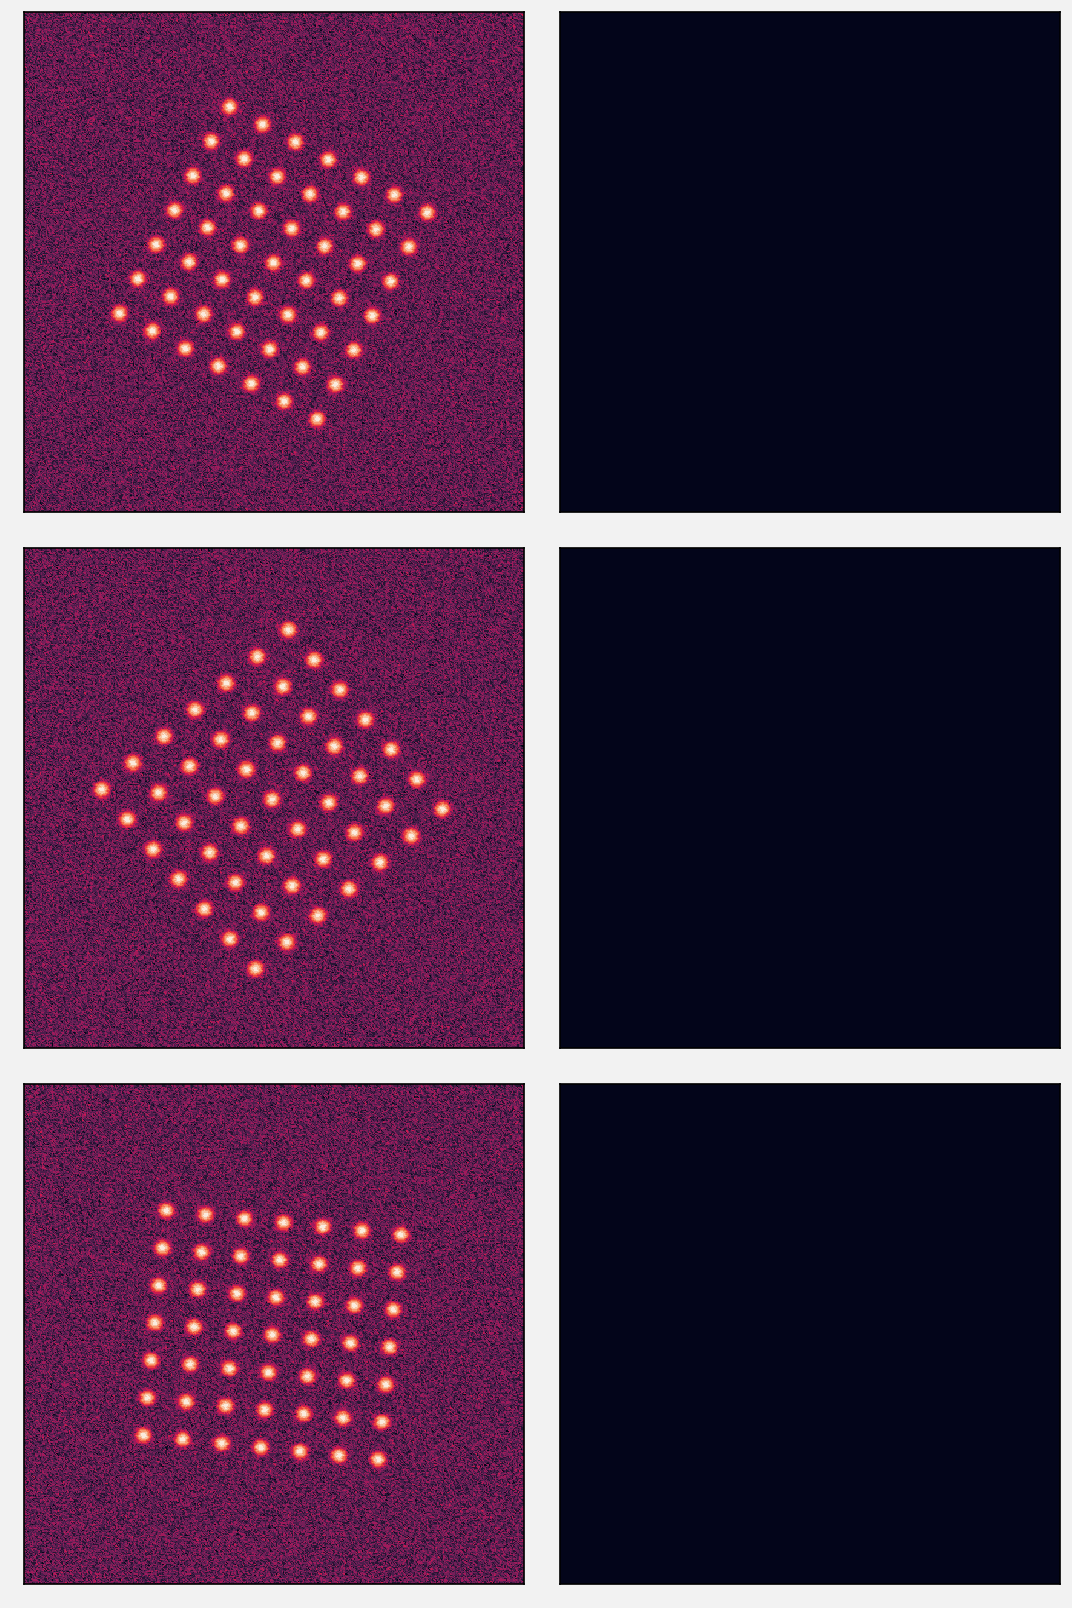

In [19]:
fig, axs = plot.subplots(nrows=len(data["img"]), ncols=2)

for i in range(len(data["img"])):
    
    axs[i, 0].pcolormesh(np.arcsinh(data["img"][i]*np.sqrt(data["wgt"][i])), cmap="rocket")
    axs[i, 0].set_aspect(1)
    axs[i, 0].xaxis.set_visible(False)
    axs[i, 0].yaxis.set_visible(False)
    axs[i, 1].pcolormesh(data["msk"][i], cmap="rocket")
    axs[i, 1].set_aspect(1)
    axs[i, 1].xaxis.set_visible(False)
    axs[i, 1].yaxis.set_visible(False)


In [20]:
import tempfile
from pizza_cutter_sims.pizza_cutter import run_des_pizza_cutter_coadding_on_sim

coadd_rng = np.random.RandomState()
with tempfile.TemporaryDirectory() as tmpdir:
    cdata = run_des_pizza_cutter_coadding_on_sim(
        rng=coadd_rng,
        tmpdir=tmpdir,
        single_epoch_config=cfg["pizza_cutter"]["single_epoch_config"],
        **data,
    )

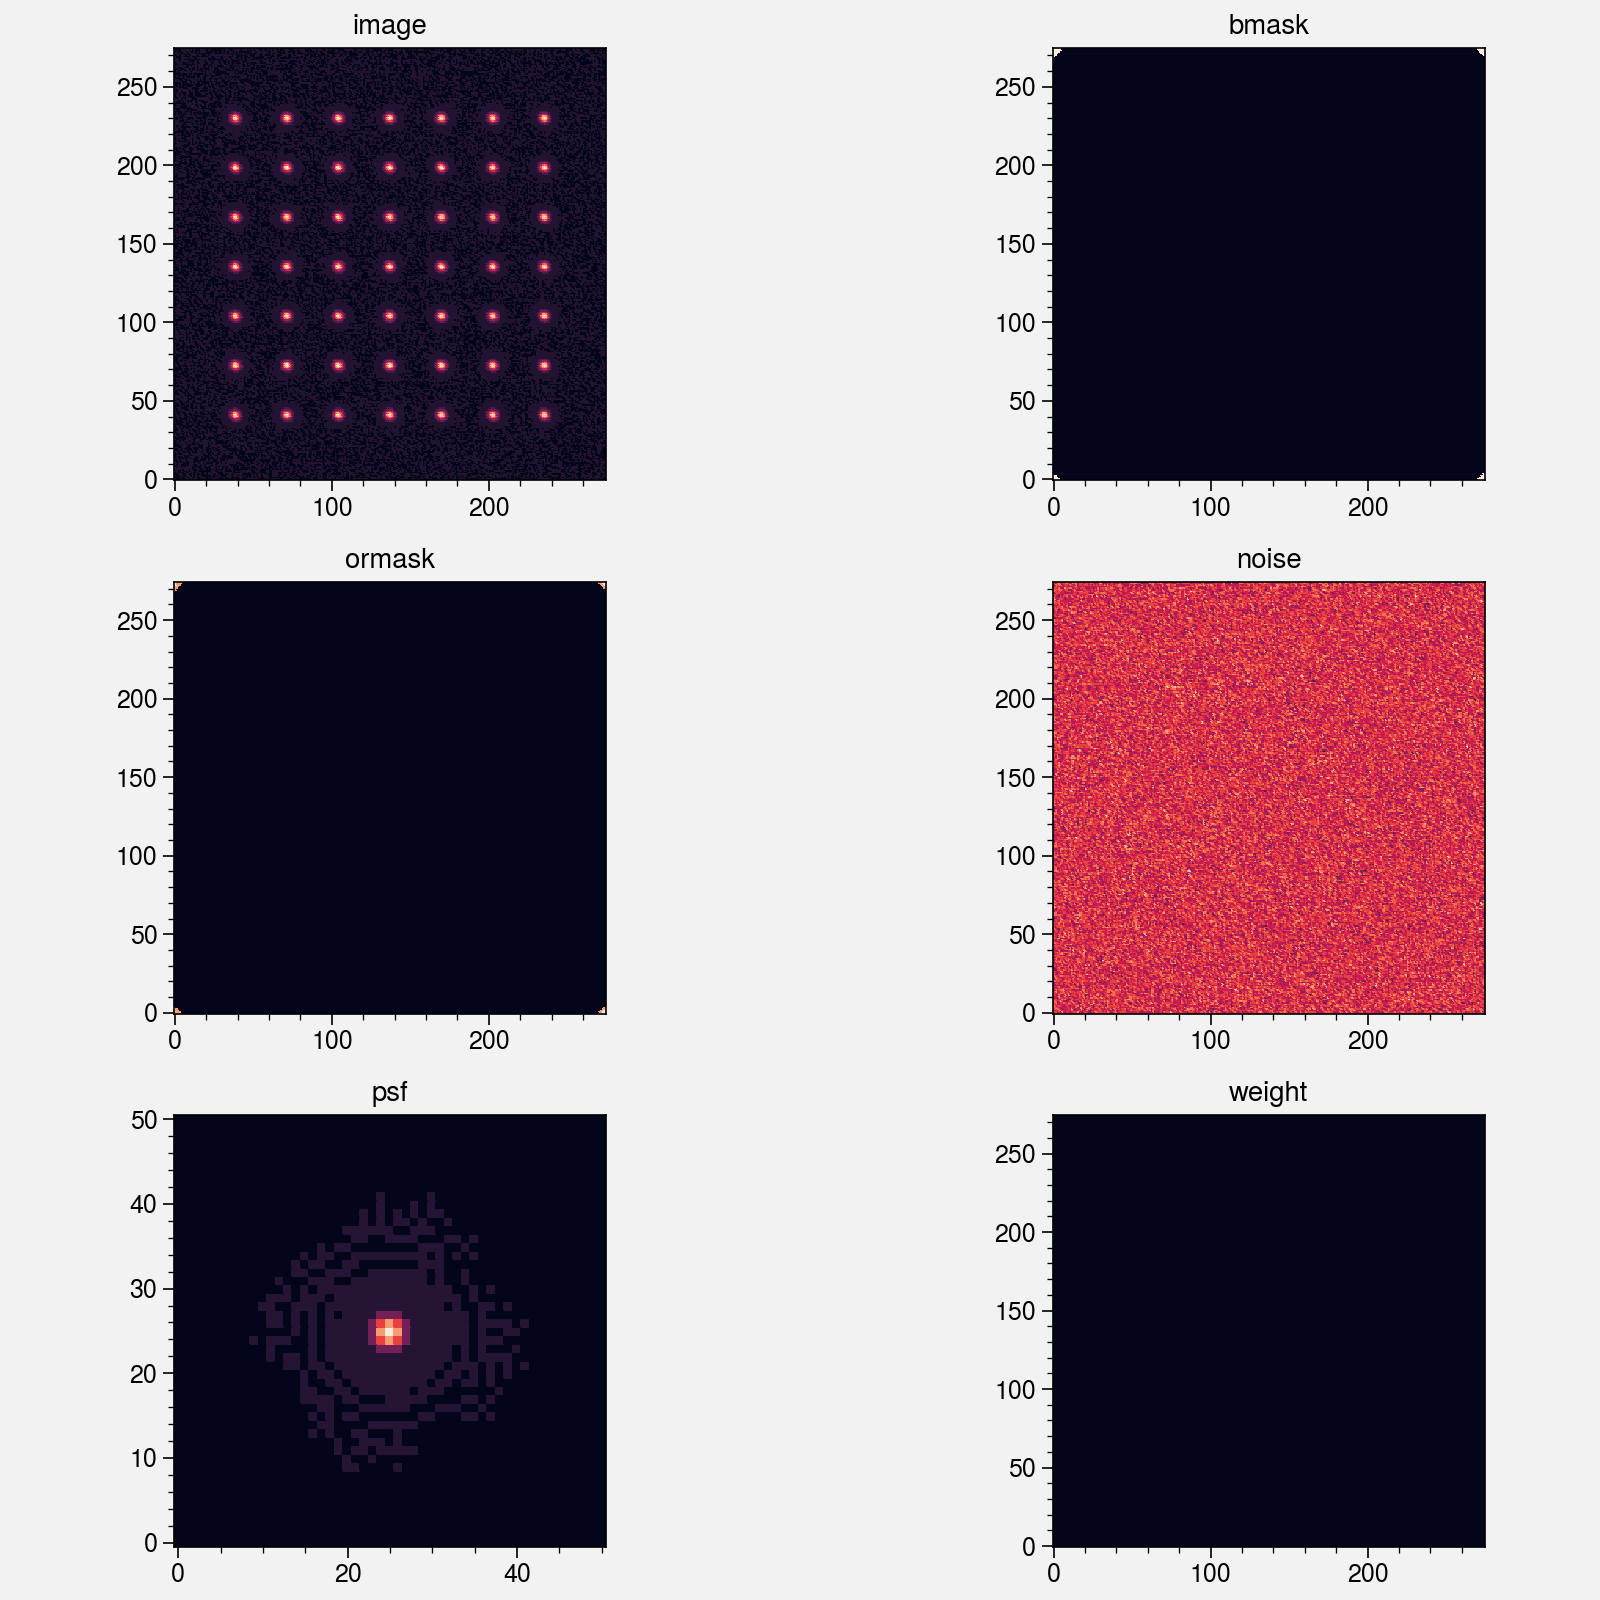

In [21]:
fig, axs = plot.subplots(nrows=3, ncols=2, figsize=(8, 8), share=0)

for i, key in enumerate(["image", "bmask", "ormask", "noise", "psf", "weight"]):
    
    axs[i].pcolormesh(cdata[key], cmap="rocket")
    axs[i].set_aspect(1)
    axs[i].set_title(key)


In [ ]:
plot.subplots?

In [ ]:
cdata["image"].shape

In [ ]:
data["img"][0].shape